# 데이터 분석에 관한 수학 이야기

* 대푯값
  * 평균중간값, 사분위값, 좌변값

* 통계에 사용하는 기초값
  * 표준편차, 분산

* 데이터 분석에서 알고자 하는 기초값 연관관계(상관관계)

In [ ]:
import numpy as np
heights = np.random.normal(161.4, 7, 200)
tmi = np.random.normal(21, 1, 200)
weights = tmi*(heights**2)

In [ ]:
print("키")
print("평균 : ",heights.mean())
print("중간값 : ",np.median(heights))
print("1/4분위값 : ",np.quantile(heights, 0.25))
print("2/4분위값 : ",np.quantile(heights, 0.5))
print("3/4분위값 : ",np.quantile(heights, 0.75))
hist,_ = np.histogram(heights, bins=[x for x in range(0, 250, 5)])
mi = hist.argmax()
print("최빈구간 : ",mi*5 + 2.5)

키
평균 :  161.44206066580657
중간값 :  161.94230730537038
1/4분위값 :  156.33300158894667
2/4분위값 :  161.94230730537038
3/4분위값 :  166.8320132698985
최빈구간 162.5


In [ ]:
cv = np.cov(heights, weights)
print(cv)
print("공분산(키, 키) : ", cv[0,0])
print("공분산(키, 몸무게) : ", cv[0,1])
print("공분산(몸무게, 키)) : ", cv[1,0])
print("공분산(몸무게, 몸무게) : ", cv[1,1])

[[5.32649230e+01 3.71725952e+05]
 [3.71725952e+05 3.29399174e+09]]
공분산(키, 키) :  53.26492301679984
공분산(키, 몸무게) :  371725.951932147
공분산(몸무게, 키)) :  371725.951932147
공분산(몸무게, 몸무게) :  3293991744.9708266


In [ ]:
def correlation(x, y):
  std_x = x.std()
  std_y = y.std()
  if std_x > 0 and std_y > 0:
    return np.cov(x, y)[0,1]/(std_x * std_y)
  else:
    return 0

In [ ]:
correlation(heights, weights)

0.8919035581078022

# CNN

Convolution Neural Network

Convolution - Pooling - Flatten - DNN

Convolution : 다차원 데이터의 특성맵을 추출하는 연산 (원본+커널=>특성맵)

Pooling : 특정 부분의 대푯값으로 대체하여 축소시키는 연산

Flatten : 1차원 구조로 변경하는 연산

In [ ]:
import numpy as np
arr = np.arange(16)
darr = arr.reshape(4, -1)
darr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
kernel = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1]])

In [ ]:
re = darr[0:3, 0:3] * kernel
re

array([[ 0,  1,  0],
       [ 4,  0,  0],
       [ 0,  0, 10]])

In [ ]:
feature = np.zeros((2, 2))
for i in range(2):
  for j in range(2):
    da = darr[i:i+3, j:j+3]*kernel
    feature[i, j] = da.sum()
print(feature)

[[15. 18.]
 [27. 30.]]


# CNN 을 이용한 fashion 분류

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# train_input2 = train_input.reshape(-1, 28, 28, 1)
# train_scaled = train_input2/255.0
train_scaled = train_input.reshape(-1, 28, 28, 1)/255.0
train_scaled2, val_scaled, train_target2, val_target = train_test_split(train_scaled, train_target, test_size=2)
test_scaled = test_input.reshape(-1, 28, 28, 1)/255.0

4431872/4422102 [==============================] - 0s 0us/step


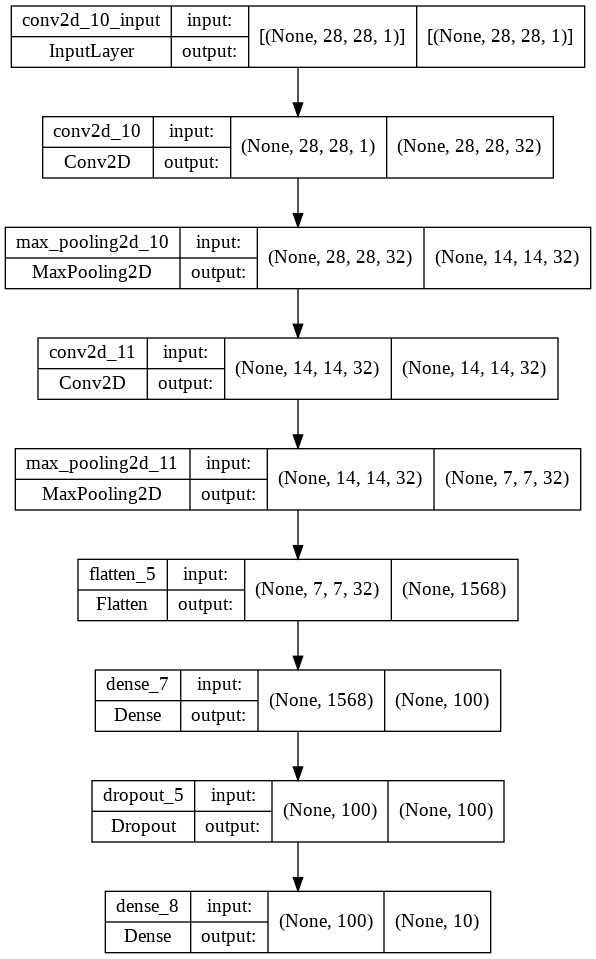

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation="relu", padding ="same", input_shape=(28, 28, 1))) #Convolution 계층 적재
model.add(keras.layers.MaxPooling2D(2)) #MaxPooling
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation="relu", padding ="same", input_shape=(28, 28, 1))) #Convolution 계층 적재
model.add(keras.layers.MaxPooling2D(2)) #MaxPooling
model.add(keras.layers.Flatten()) # 1차원 구조로 변환
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dropout(0.4)) # 40%의 입력 뉴런을 비활성화(랜덤하게 돌아가면서 학습에서 배제)
model.add(keras.layers.Dense(10, activation = "softmax"))
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer="adam", loss=keras.losses.sparse_categorical_crossentropy, metrics="accuracy")
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1568)              0         
                                                                 
 dense_7 (Dense)             (None, 100)              

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-cnn-model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
history = model.fit(train_scaled2, train_target2, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1875/1875 [==============================] - 61s 32ms/step - loss: 0.5050 - accuracy: 0.8194 - val_loss: 0.4043 - val_accuracy: 1.0000
Epoch 2/20
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3396 - accuracy: 0.8784 - val_loss: 0.1380 - val_accuracy: 1.0000
Epoch 3/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2933 - accuracy: 0.8940 - val_loss: 0.0869 - val_accuracy: 1.0000
Epoch 4/20
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2619 - accuracy: 0.9047 - val_loss: 0.0542 - val_accuracy: 1.0000
Epoch 5/20
1875/1875 [==============================] - 59s 32ms/step - loss: 0.2389 - accuracy: 0.9121 - val_loss: 0.1660 - val_accuracy: 1.0000
Epoch 6/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2237 - accuracy: 0.9173 - val_loss: 0.1026 - val_accuracy: 1.0000
Epoch 7/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2079 - accuracy: 0.9238 - val_loss: 0.1123 -

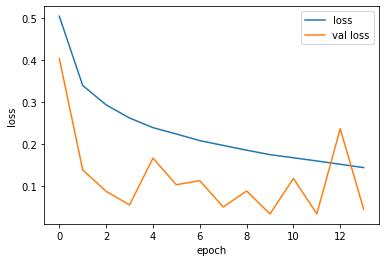

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

1/1 [==============================] - 0s 48ms/step - loss: 0.0328 - accuracy: 1.0000


[0.032796479761600494, 1.0]

In [ ]:
val_scaled[0:1].shape, val_scaled[0].shape

((1, 28, 28, 1), (28, 28, 1))

In [ ]:
preds = model.predict(val_scaled[0:1])
# print(preds)
for v in preds[0]:
  print(f"{v:.2f}", end=" ")
print()
print(val_target[0])

0.99 0.00 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 
0


In [ ]:
classes = ["티셔츠", "바지", "스웨터", "드레스", "코드", "센달", "셔츠", "스니커즈", "가방", "앵클부츠"]

In [ ]:
mi = np.argmax(preds)
print(classes[mi])

티셔츠


In [ ]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2376 - accuracy: 0.9173


[0.23760642111301422, 0.9172999858856201]

# CNN 보충 설명

In [ ]:
model2 = keras.models.load_model("best-cnn-model.h5")

In [ ]:
model2.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 11ms/step - loss: 0.2376 - accuracy: 0.9173


[0.23760642111301422, 0.9172999858856201]

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1568)              0         
                                                                 
 dense_7 (Dense)             (None, 100)              

In [ ]:
conv = model2.layers[0]
conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [ ]:
print(conv.weights[0])
print(conv.weights[1])

<tf.Variable 'conv2d_10/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.07249994,  0.21143487, -0.09300803, -0.04123539,
          -0.03586661,  0.02540253, -0.24179198,  0.11148395,
          -0.1842839 ,  0.25531432,  0.04367502, -0.04492487,
           0.01255862, -0.03087782, -0.24707061, -0.25521702,
          -0.29382664, -0.01217858, -0.77004796, -0.01956399,
           0.06971148,  0.21491215, -0.25339696, -0.063578  ,
          -0.20779549,  0.0835209 , -0.35377958, -0.2000966 ,
          -0.11660981, -0.16004075, -0.01442689,  0.31268057]],

        [[-0.0297357 , -0.32437426,  0.11109963, -0.05770379,
           0.303005  , -0.0799523 , -0.57047373,  0.17401843,
           0.4976691 ,  0.4501206 ,  0.00357886, -0.22869581,
          -0.06451667, -0.16664225,  0.15164454, -0.18456842,
          -1.6790481 , -0.2816931 , -0.16414325,  0.1126316 ,
          -0.32994094, -0.06831989,  0.07024008, -0.06552718,
           0.26477018, -0.13056917,  0.18520135, -0.3

매개변수 확인

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
xs = iris_data.data
print(xs.shape)
ys = iris_data.target
print(ys.shape)

(150, 4)
(150,)


In [ ]:
ys

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
heights.shape, weights.shape

((200,), (200,))

In [ ]:
xs = heights.reshape(200,1)
xs.shape

(200, 1)

In [ ]:
ys = weights/10000

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(xs, ys)

LinearRegression()

In [ ]:
lr_model.coef_, lr_model.intercept_ # 가중치, 편향

(array([0.69788133]), -57.77782258794683)

In [ ]:
pre_vals = lr_model.predict([[178], [180]])
pre_vals

array([66.44505374, 67.84081639])

In [ ]:
pre_val0 = 178 * lr_model.coef_ + lr_model.intercept_
pre_val1 = 180 * lr_model.coef_ + lr_model.intercept_
pre_val0, pre_val1

(array([66.44505374]), array([67.84081639]))

CNN 보충

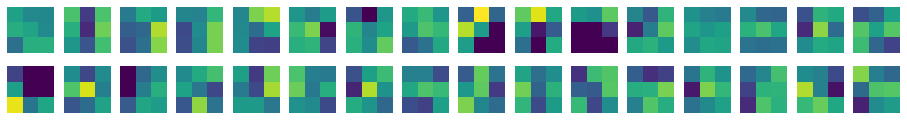

In [ ]:
conv = model.layers[0]
conv_weights = conv.weights[0].numpy()
fig, axs = plt.subplots(2, 16, figsize = [16,2])
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis("off")
plt.show()

학습하지 않은 모델의 conv의 매개변수를 확인

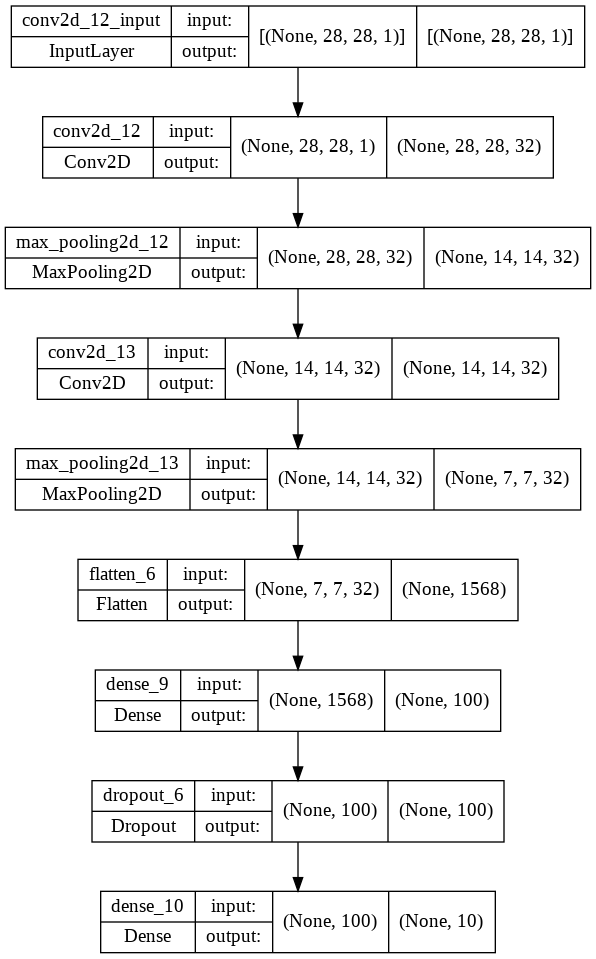

In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Conv2D(32, kernel_size = 3, activation="relu", padding ="same", input_shape=(28, 28, 1))) #Convolution 계층 적재
model3.add(keras.layers.MaxPooling2D(2)) #MaxPooling
model3.add(keras.layers.Conv2D(32, kernel_size = 3, activation="relu", padding ="same", input_shape=(28, 28, 1))) #Convolution 계층 적재
model3.add(keras.layers.MaxPooling2D(2)) #MaxPooling
model3.add(keras.layers.Flatten()) # 1차원 구조로 변환
model3.add(keras.layers.Dense(100, activation = "relu"))
model3.add(keras.layers.Dropout(0.4)) # 40%의 입력 뉴런을 비활성화(랜덤하게 돌아가면서 학습에서 배제)
model3.add(keras.layers.Dense(10, activation = "softmax"))
keras.utils.plot_model(model3, show_shapes=True)

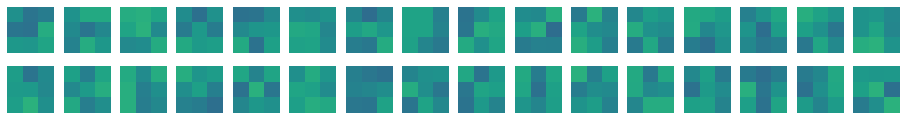

In [ ]:
conv3 = model3.layers[0]
conv_weights3 = conv3.weights[0].numpy()
fig, axs = plt.subplots(2, 16, figsize = [16,2])
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights3[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis("off")
plt.show()

# 확률

어떤 사건 a가 발생할 확률은 P(a)라고 표현한다

0 <= P(a) <= 1

a가 발생하지 않을 확률은 1-P(a)이다.

In [ ]:
pa = 0.5 # 사건 a가 발생할 확률이 0.5이다. (동전을 던졌을 때 앞면이 나올 확률)
pb = 1/6 # 사건 b가 발생할 확률이 1/6이다.

* 조건부 사건

사건 a가 발생한 상태에서 사건 b가 발생할 확률을 조건부 확률이라고 말한다.

P(bla)

* 독립 사건

사건 b는 사건 a의 발생여부와 관계없는 확률을 가진다

P(bla) = P(b)

가정) b와 a가 독립 사건일때, P(a and b) = P(a)P(b)

In [ ]:
pa_pb = pa*pb
print(f"pa:{pa:.2f}, pb:{pb:.2f}, pa_pb:{pa_pb:.2f}")

pa:0.50, pb:0.17, pa_pb:0.08


* 균등분포 함수

사건종류가 n개 일때 각 사건이 발생할 확률 1/n

In [4]:
def uniform_pdf(x, min_v=0, max_v=1):
  if min_v <= x <= max_v:
    return 1/(max_v - min_v)
  else:
    return 0

* 누적 균일 분포함수

사건이 발생할 종류가 n개일때 사건 0에서 사건i까지 발생할 누적 확률을 계산하는 함수

In [1]:
def uniform_cdf(x,min_v=0,max_v=1):
  if x<min_v:
    return 0
  if min_v<=x<max_v:
    return (x-min_v+1)/(max_v-min_v)
  else:
    return 1

In [5]:
xs =[] #사건
pys=[] #사건이 발생할 확률
cys=[] #누적 확률
for x in range(-10,10):
  cys.append(uniform_cdf(x, 1, 6+1)) #주사위를 던져서 x가 나올 확률
  pys.append(uniform_pdf(x, 1, 6+1)) #주사위를 던져서 x이하의 수가 나올 확률
  xs.append(x)

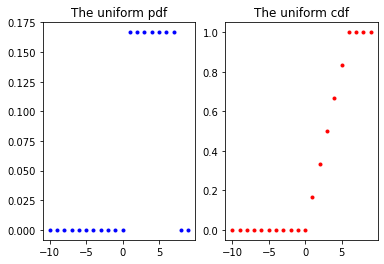

In [6]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1, 2)
ax[0].plot(xs, pys,"b.", label="pdf")
ax[1].plot(xs, cys,"r.", label="cdf")
ax[0].set_title("The uniform pdf")
ax[1].set_title("The uniform cdf")
plt.show()

In [7]:
import math
def normal_pdf(x, mu=0, sigma=1):#정규분포 함수(mu:평균, sigma:표준편차, 참고:평균 0, 표준편차1인 정규분포를 표준 정규 분포)
  pre = 1/(sigma*math.sqrt(2*math.pi))
  post = math.exp(- ((x-mu)**2)/(2*(sigma**2)))
  return pre*post

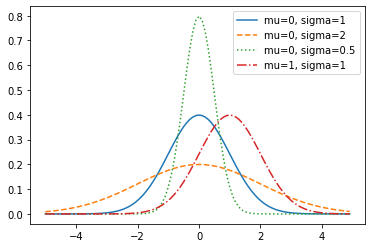

In [8]:
xs=[x/10.0 for x in range(-50,50)] #-5.0에서 4.9까지 0.1씩 증가하는 값으로 구성
ys1 = [normal_pdf(x) for x in xs] #평균 0, 표준편차1
ys2 = [normal_pdf(x,sigma=2) for x in xs] #평균0, 표준편차2
ys3 = [normal_pdf(x,sigma=0.5) for x in xs] #평균 0, 표준편차 0.5
ys4 = [normal_pdf(x,mu=1) for x in xs] #평균1, 표준편차 1
plt.plot(xs,ys1,'-',label='mu=0, sigma=1')
plt.plot(xs,ys2,'--',label='mu=0, sigma=2')
plt.plot(xs,ys3,':',label='mu=0, sigma=0.5')
plt.plot(xs,ys4,'-.',label='mu=1, sigma=1')
plt.legend()
plt.show()

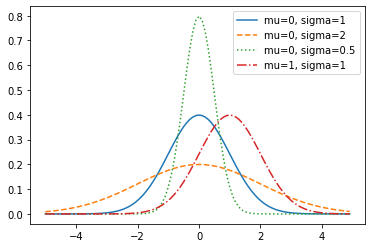

In [9]:
import scipy.stats as st
xs=[x/10.0 for x in range(-50,50)] #-5.0에서 4.9까지 0.1씩 증가하는 값으로 구성
ys1 = [st.norm.pdf(x) for x in xs] #평균 0, 표준편차1
ys2 = [st.norm.pdf(x,scale=2) for x in xs] #평균0, 표준편차2
ys3 = [st.norm.pdf(x,scale=0.5) for x in xs] #평균 0, 표준편차 0.5
ys4 = [st.norm.pdf(x,loc=1) for x in xs] #평균1, 표준편차 1
plt.plot(xs,ys1, '-', label='mu=0, sigma=1')
plt.plot(xs,ys2, '--', label='mu=0, sigma=2')
plt.plot(xs,ys3, ':', label='mu=0, sigma=0.5')
plt.plot(xs,ys4, '-.', label='mu=1, sigma=1')
plt.legend()
plt.show()

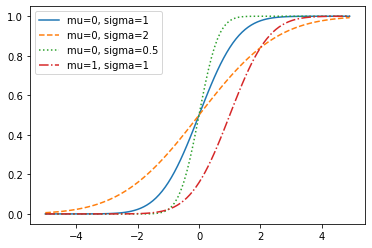

In [10]:
import scipy.stats as st
xs=[x/10.0 for x in range(-50,50)] #-5.0에서 4.9까지 0.1씩 증가하는 값으로 구성
ys1 = [st.norm.cdf(x) for x in xs] #평균 0, 표준편차1
ys2 = [st.norm.cdf(x,scale=2) for x in xs] #평균0, 표준편차2
ys3 = [st.norm.cdf(x,scale=0.5) for x in xs] #평균 0, 표준편차 0.5
ys4 = [st.norm.cdf(x,loc=1) for x in xs] #평균1, 표준편차 1
plt.plot(xs,ys1,'-',label='mu=0, sigma=1')
plt.plot(xs,ys2,'--',label='mu=0, sigma=2')
plt.plot(xs,ys3,':',label='mu=0, sigma=0.5')
plt.plot(xs,ys4,'-.',label='mu=1, sigma=1')
plt.legend()
plt.show()